In [14]:
# Imports

import pandas as pd

import matplotlib.pyplot as plt

from sklearn.inspection import PartialDependenceDisplay
from sklearn.ensemble import RandomForestClassifier

In [4]:
# Reading in the data

DIR = "../data/"
DATA = "cervical.csv"
cervical = pd.read_csv(DIR+DATA)
cervical.head()

,Age,Number.of.sexual.partners,First.sexual.intercourse,Num.of.pregnancies,Smokes,Smokes..years.,Hormonal.Contraceptives,Hormonal.Contraceptives..years.,IUD,IUD..years.,STDs,STDs..number.,STDs..Number.of.diagnosis,STDs..Time.since.first.diagnosis,STDs..Time.since.last.diagnosis,Biopsy
0,18,4,15,1,0,0.0,0,0.0,0,0.0,0,0,0,1,1,Healthy
1,15,1,14,1,0,0.0,0,0.0,0,0.0,0,0,0,1,1,Healthy
2,34,1,15,1,0,0.0,0,0.0,0,0.0,0,0,0,1,1,Healthy
3,52,5,16,4,1,37.0,1,3.0,0,0.0,0,0,0,1,1,Healthy
4,46,3,21,4,0,0.0,1,15.0,0,0.0,0,0,0,1,1,Healthy


In [ ]:
# Converting the "Biopsy" to binary

cervical['Biopsy'] = cervical['Biopsy'].apply(lambda row: 1 if row=='Cancer' else 0)

In [ ]:
cervical.info()

In [5]:
cervical.describe()

,Age,Number.of.sexual.partners,First.sexual.intercourse,Num.of.pregnancies,Smokes,Smokes..years.,Hormonal.Contraceptives,Hormonal.Contraceptives..years.,IUD,IUD..years.,STDs,STDs..number.,STDs..Number.of.diagnosis,STDs..Time.since.first.diagnosis,STDs..Time.since.last.diagnosis
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.511655,16.979021,2.192308,0.143357,1.201241,0.686480,1.972394,0.096737,0.444604,0.092075,0.155012,0.087413,1.425408,1.398601
std,8.497948,1.644759,2.797653,1.434395,0.350641,4.060623,0.464194,3.597888,0.295771,1.814218,0.289300,0.529617,0.302545,2.201550,2.113931
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,1.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,1.000000,30.000000,1.000000,19.000000,1.000000,4.000000,3.000000,22.000000,22.000000


In [20]:
# Organizing features and label

features = [col for col in cervical.columns if col != 'Biopsy']
X = cervical[features]
y = cervical['Biopsy']

In [21]:
# Running a random forest

rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

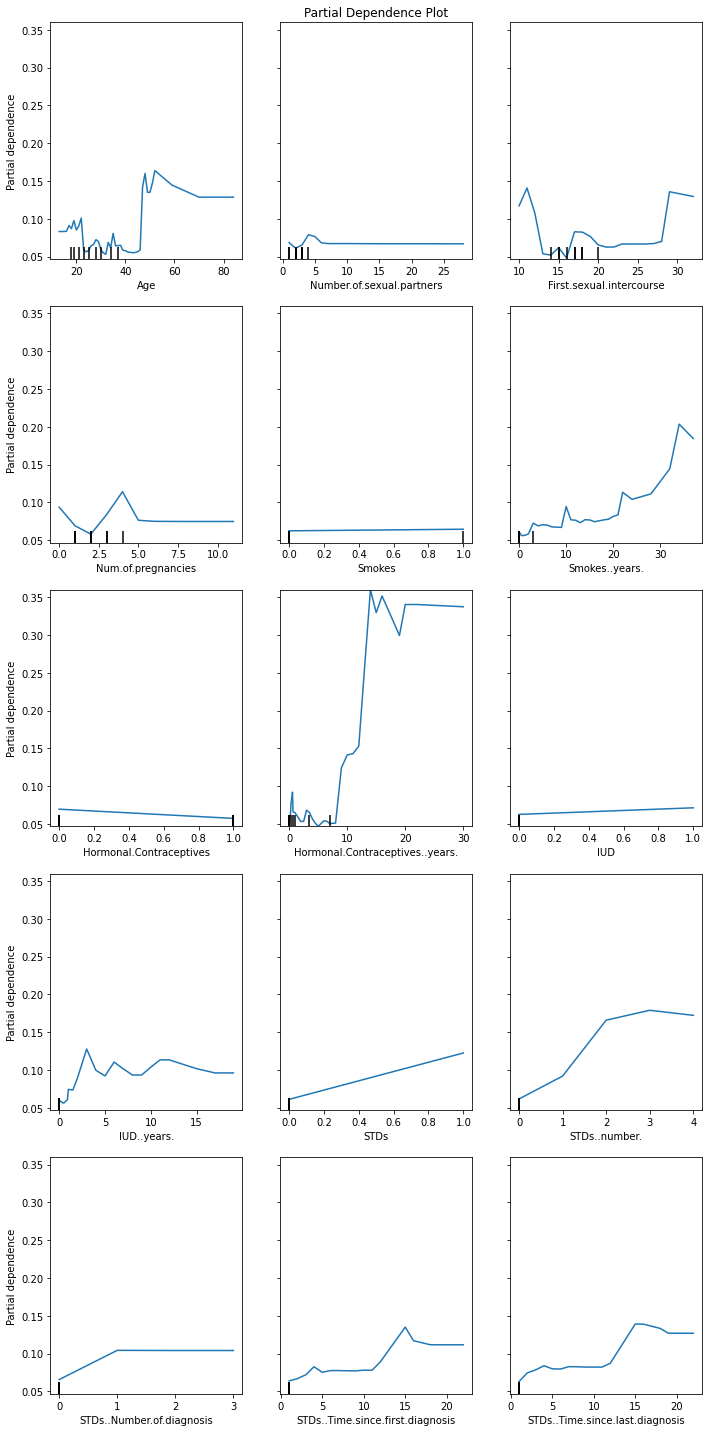

In [26]:
# Plotting a Partial Dependence Plot

fig, ax = plt.subplots(figsize=(10, 20))
PartialDependenceDisplay.from_estimator(
    estimator=rf,
    X=X,
    features=features,
    target=y,
    ax=ax
)
ax.set_title("Partial Dependence Plot")
plt.tight_layout();

In [36]:
data = cervical[['Age', 'Num.of.pregnancies']]

In [38]:
data

,Age,Num.of.pregnancies
0,18,1
1,15,1
2,34,1
3,52,4
4,46,4
...,...,...
853,34,0
854,32,1
855,25,0
856,33,2


In [40]:
# fig, ax = plt.subplots(figsize=(8,6))

# plt.subplot(1,1,1)
# plt.pcolormesh(data, cmap = 'rainbow')
# plt.title('HeatMap Using pcolormesh function')